In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [108]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

In [109]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [110]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [111]:
df.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [113]:
df.shape

(31822, 38)

In [114]:
df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [115]:
df.head().transpose()

,0,1,2,3,4
Date,3/1/2020,3/2/2020,3/2/2020,3/2/2020,3/3/2020
Location ISO Code,ID-JK,ID-JK,IDN,ID-RI,ID-JK
Location,DKI Jakarta,DKI Jakarta,Indonesia,Riau,DKI Jakarta
New Cases,2,2,2,1,2
New Deaths,0,0,0,0,0
New Recovered,0,0,0,0,0
New Active Cases,2,2,2,1,2
Total Cases,39,41,2,1,43
Total Deaths,20,20,0,0,20
Total Recovered,75,75,0,1,75


--------------

In [116]:
df.drop(columns = ['City or Regency'], inplace = True)

In [117]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [118]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [119]:
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [120]:
print("\nJumlah data setelah imputasi:", df.shape)


Jumlah data setelah imputasi: (31822, 37)


In [121]:
df.isnull().sum()

Date                           0
Location ISO Code              0
Location                       0
New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Location Level                 0
Province                       0
Country                        0
Continent                      0
Island                         0
Time Zone                      0
Special Status                 0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Cases per Million        0
New Deaths

In [122]:
df.shape

(31822, 37)

In [123]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2.0,0.0,0.0,2.0,39.0,20.0,75.0,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,1.0,1.0
1,3/2/2020,ID-JK,DKI Jakarta,2.0,0.0,0.0,2.0,41.0,20.0,75.0,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2.0,0.0,0.0,2.0,2.0,0.0,0.0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,1.0,1.0
3,3/2/2020,ID-RI,Riau,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,1.0,1.0
4,3/3/2020,ID-JK,DKI Jakarta,2.0,0.0,0.0,2.0,43.0,20.0,75.0,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  float64
 4   New Deaths                   31822 non-null  float64
 5   New Recovered                31822 non-null  float64
 6   New Active Cases             31822 non-null  float64
 7   Total Cases                  31822 non-null  float64
 8   Total Deaths                 31822 non-null  float64
 9   Total Recovered              31822 non-null  float64
 10  Total Active Cases           31822 non-null  float64
 11  Location Level               31822 non-null  object 
 12  Province                     31822 non-null  object 
 13  Country         

------------

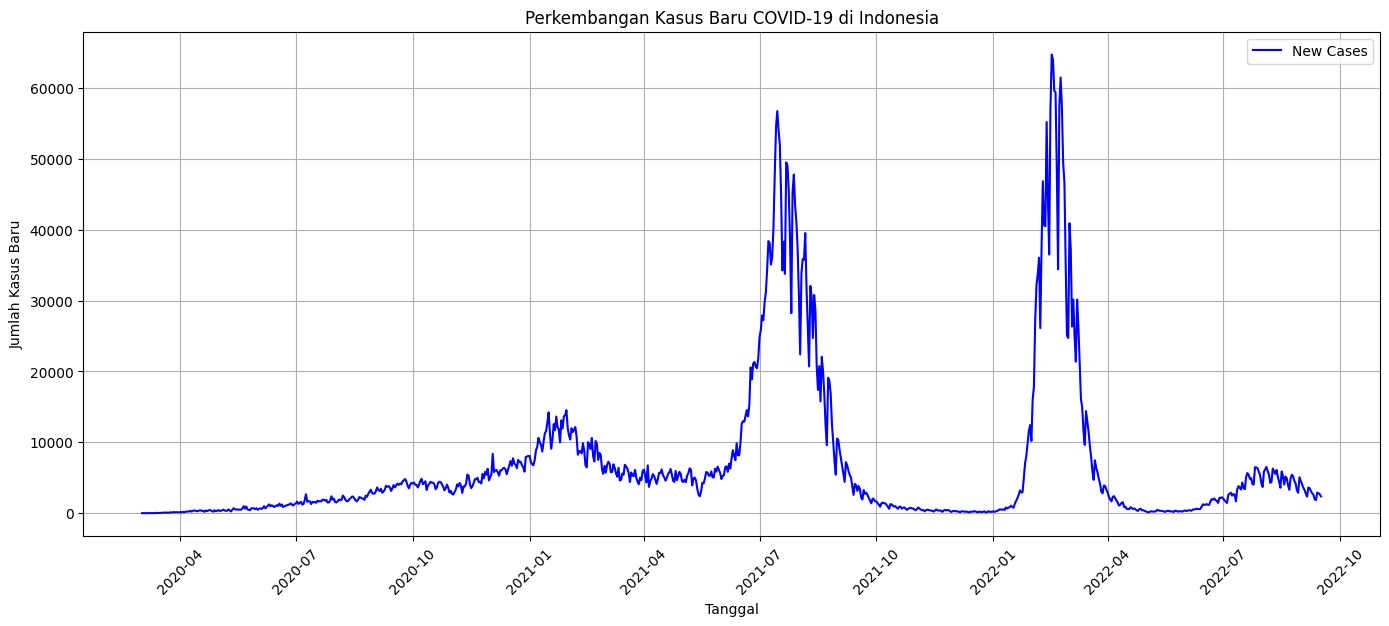

In [125]:
df_indonesia = df[df['Location'] == 'Indonesia'].copy()
df_indonesia['Date'] = pd.to_datetime(df_indonesia['Date'])
df_indonesia.sort_values('Date', inplace=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_indonesia, x='Date', y='New Cases', label='New Cases', color='blue')
plt.title('Perkembangan Kasus Baru COVID-19 di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

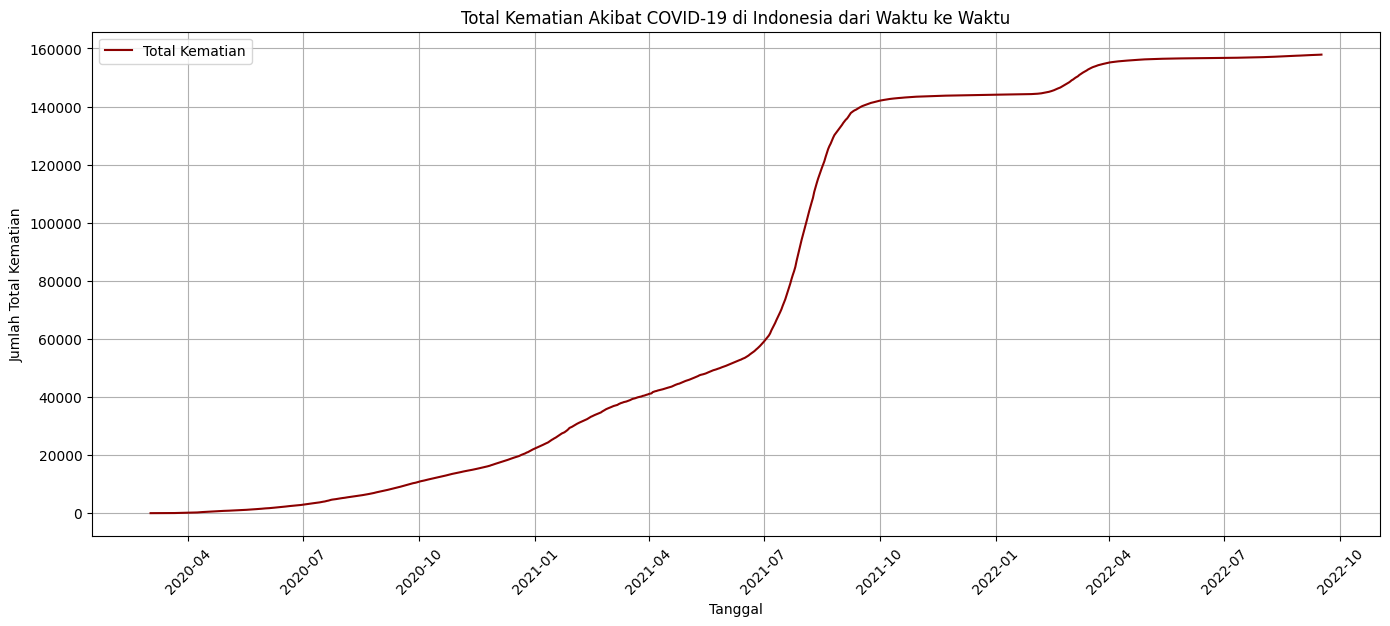

In [126]:
plt.figure(figsize=(14, 6))
plt.plot(df_indonesia['Date'], df_indonesia['Total Deaths'], color='darkred', label='Total Kematian')
plt.title('Total Kematian Akibat COVID-19 di Indonesia dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Total Kematian')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

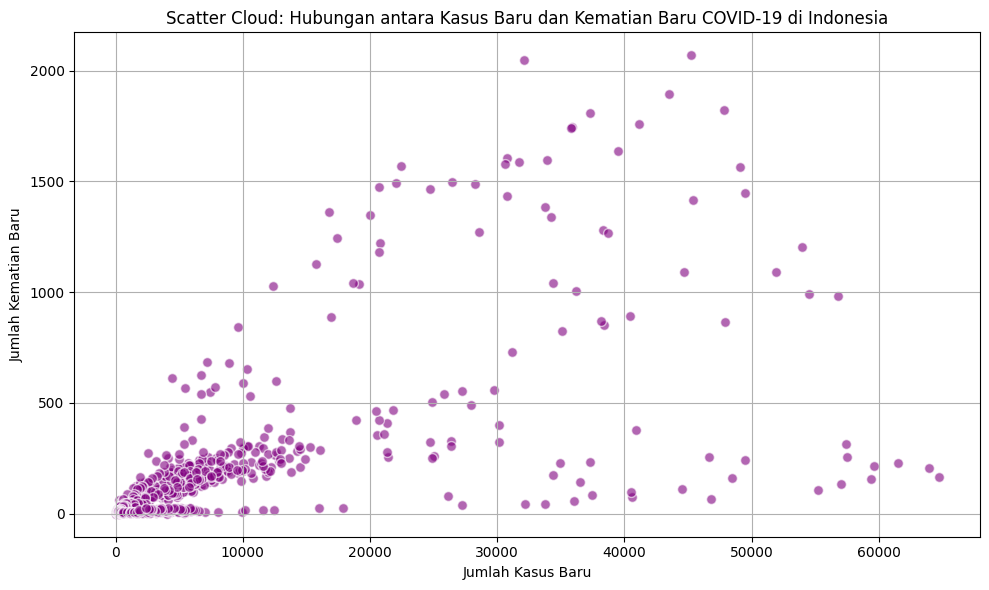

In [127]:
df_indonesia = df_indonesia.dropna(subset=['New Cases', 'New Deaths'])
plt.figure(figsize=(10, 6))
plt.scatter(df_indonesia['New Cases'], df_indonesia['New Deaths'],
            alpha=0.6, c='purple', edgecolors='w', s=50)
plt.title('Scatter Cloud: Hubungan antara Kasus Baru dan Kematian Baru COVID-19 di Indonesia')
plt.xlabel('Jumlah Kasus Baru')
plt.ylabel('Jumlah Kematian Baru')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------

In [128]:
features = df[['New Cases', 'New Deaths', 'Total Cases']]
target = (df['Total Deaths'] > 0).astype(int)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [130]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [131]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Akurasi: 0.94
              precision    recall  f1-score   support

           0       0.15      1.00      0.26        67
           1       1.00      0.94      0.97      6298

    accuracy                           0.94      6365
   macro avg       0.57      0.97      0.61      6365
weighted avg       0.99      0.94      0.96      6365



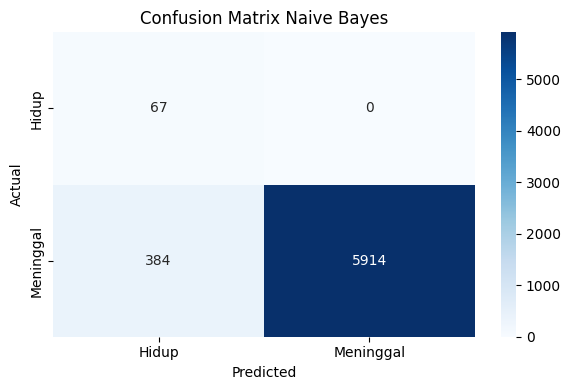

In [132]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hidup', 'Meninggal'],
            yticklabels=['Hidup', 'Meninggal'])
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()